In [1]:
from pulp import *
import numpy as np

# Question 1.
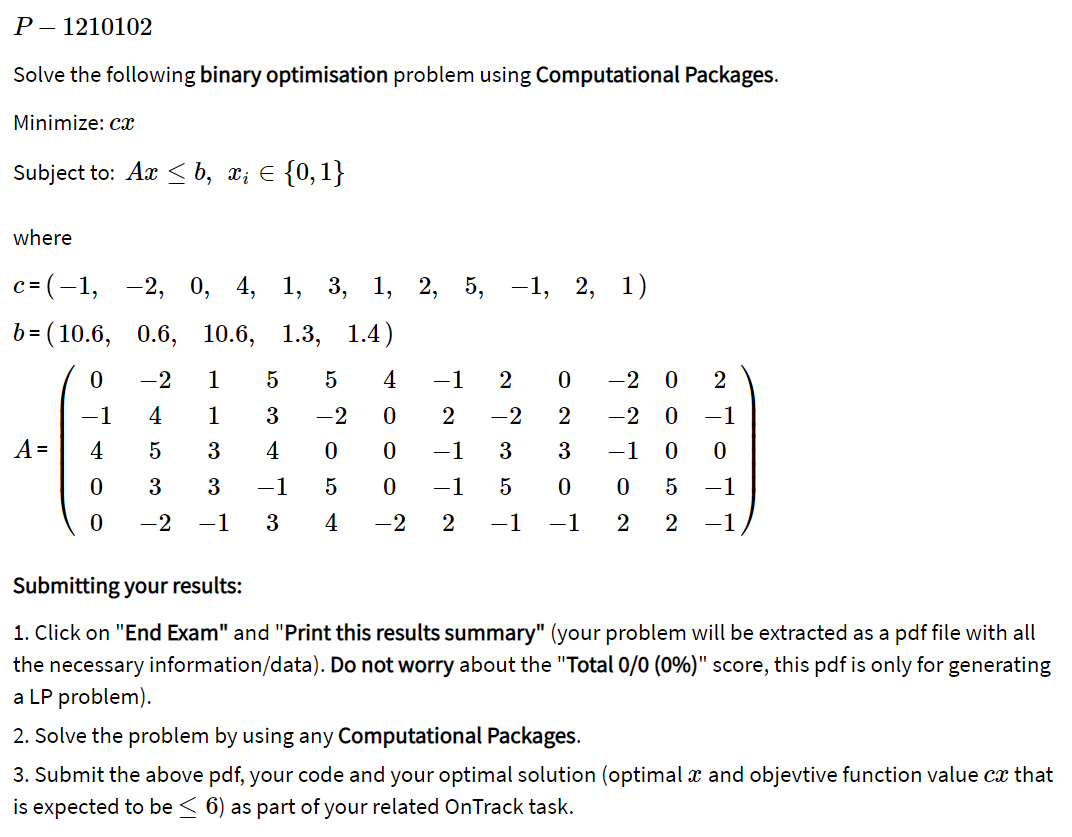

In [2]:
c=[-1,-2,0,4,1,3,1,2,5,-1,2,1]
b= [10.6,0.6,10.6,1.3,1.4]
a= [[0,-2,1,5,5,4,-1,2,0,-2,0,2],
    [-1,4,1,3,-2,0,2,-2,2,-2,0,-1],
    [4,5,3,4,0,0,-1,3,3,-1,0,0],
    [0,3,3,-1,5,0,-1,5,0,0,5,-1],
    [0,-2,-1,3,4,-2,2,-1,-1,2,2,-1]  
]

# change inputs to the matrix and vector form by using nparray
np_c = np.array(c)
np_LHS = np.array(a)
np_RHS = np.array(b)

n_variables = len(c)
n_constraints = len(b)

In [3]:
# Find # of variables
variable_names = [str(i) for i in range(1, n_variables+1)]

# add numbers on variable X
T_variables = LpVariable.matrix("X", variable_names, cat = "Integer", lowBound= 0 )

# Switched to nparry for multiply with variables
allocation = np.array(T_variables)

In [4]:
# Define model
prob = LpProblem("Quiz1", LpMinimize)

In [5]:
# Define Objective function & binary constraints
obj_func = lpSum(np_c * allocation)
prob += obj_func
# prob

In [6]:
# Define Constraints
for i in range(n_constraints):
#     print(lpSum(allocation[j]*np_LHS[i][j] for j in range(n_variables)) <= np_RHS[i])
    prob += lpSum(allocation[j]*np_LHS[i][j] for j in range(n_variables)) <= np_RHS[i]
prob

quiz1:
MINIMIZE
-1*X_1 + -1*X_10 + 2*X_11 + 1*X_12 + -2*X_2 + 4*X_4 + 1*X_5 + 3*X_6 + 1*X_7 + 2*X_8 + 5*X_9 + 0
SUBJECT TO
_C1: - 2 X_10 + 2 X_12 - 2 X_2 + X_3 + 5 X_4 + 5 X_5 + 4 X_6 - X_7 + 2 X_8
 <= 10.6

_C2: - X_1 - 2 X_10 - X_12 + 4 X_2 + X_3 + 3 X_4 - 2 X_5 + 2 X_7 - 2 X_8
 + 2 X_9 <= 0.6

_C3: 4 X_1 - X_10 + 5 X_2 + 3 X_3 + 4 X_4 - X_7 + 3 X_8 + 3 X_9 <= 10.6

_C4: 5 X_11 - X_12 + 3 X_2 + 3 X_3 - X_4 + 5 X_5 - X_7 + 5 X_8 <= 1.3

_C5: 2 X_10 + 2 X_11 - X_12 - 2 X_2 - X_3 + 3 X_4 + 4 X_5 - 2 X_6 + 2 X_7
 - X_8 - X_9 <= 1.4

VARIABLES
0 <= X_1 Integer
0 <= X_10 Integer
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_2 Integer
0 <= X_3 Integer
0 <= X_4 Integer
0 <= X_5 Integer
0 <= X_6 Integer
0 <= X_7 Integer
0 <= X_8 Integer
0 <= X_9 Integer

In [9]:
# Find the solution`
status = prob.solve()
LpStatus[status]

'Optimal'

In [11]:
print("All variables:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

All variables:
X_1 = 0.0
X_10 = 10.0
X_11 = 0.0
X_12 = 11.0
X_2 = 4.0
X_3 = 0.0
X_4 = 0.0
X_5 = 0.0
X_6 = 0.0
X_7 = 0.0
X_8 = 0.0
X_9 = 0.0


In [13]:
# Minimum value of the objective function
print(f"min CX = {str(value(prob.objective))}")

min CX = -7.0


# Question 2.
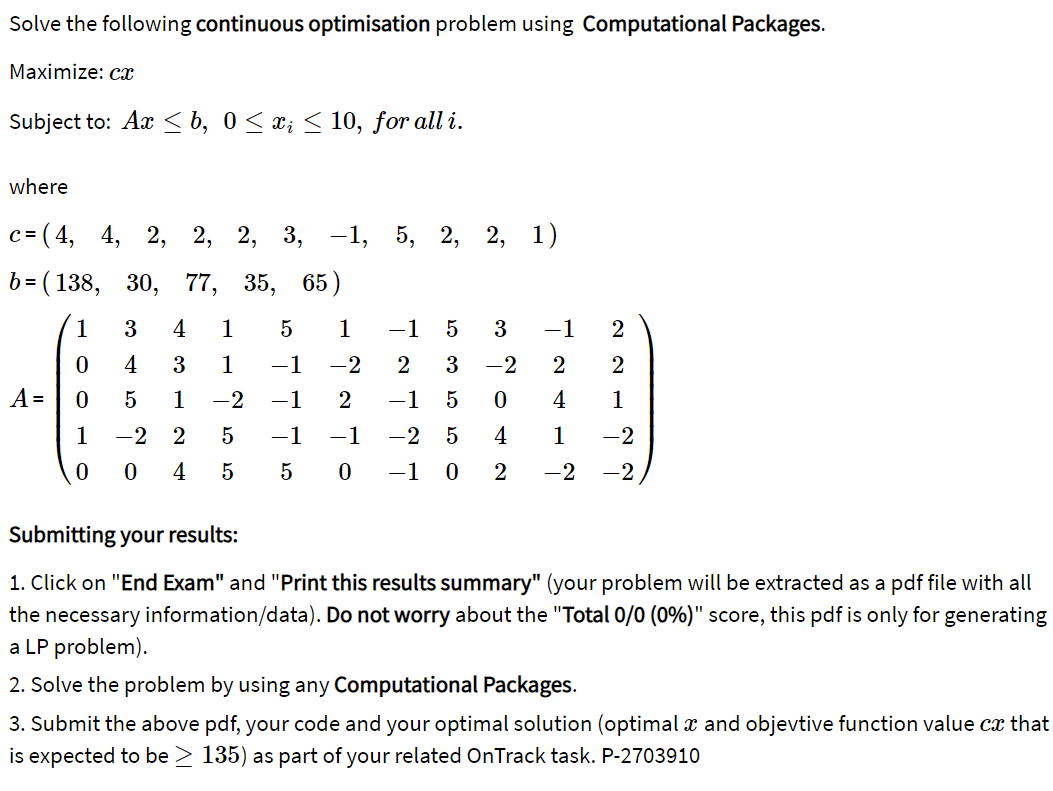

In [17]:
c=[4,4,2,2,2,3,-1,5,2,2,1]
b= [138,30,77,35,65]
a= [[1,3,4,1,5,1,-1,5,3,-1,2],
    [0,4,3,1,-1,-2,2,3,-2,2,2],
    [0,5,1,-2,-1,2,-1,5,0,4,1],
    [1,-2,2,5,-1,-1,-2,5,4,1,-2],
    [0,0,4,5,5,0,-1,0,2,-2,-2]
]

# change inputs to the matrix and vector form by using nparray
np_c = np.array(c)
np_LHS = np.array(a)
np_RHS = np.array(b)

n_variables = len(c) #11
n_constraints = len(b) #5

In [20]:
# Find # of variables
variable_names = [str(i) for i in range(1, n_variables+1)]

# add numbers on variable X
T_variables = LpVariable.matrix("X", variable_names, lowBound= 0, upBound=10 )

# Switched to nparry for multiply with variables
allocation = np.array(T_variables)

#[X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11]

In [21]:
# Define model
prob = LpProblem("Quiz2", LpMaximize)

In [22]:
# Define Objective function & binary constraints
obj_func = lpSum(np_c * allocation)
prob += obj_func

In [23]:
# Define Constraints
for i in range(n_constraints):
#     print(lpSum(allocation[j]*np_LHS[i][j] for j in range(n_variables)) <= np_RHS[i])
    prob += lpSum(allocation[j]*np_LHS[i][j] for j in range(n_variables)) <= np_RHS[i]
prob

Quiz2:
MAXIMIZE
4*X_1 + 2*X_10 + 1*X_11 + 4*X_2 + 2*X_3 + 2*X_4 + 2*X_5 + 3*X_6 + -1*X_7 + 5*X_8 + 2*X_9 + 0
SUBJECT TO
_C1: X_1 - X_10 + 2 X_11 + 3 X_2 + 4 X_3 + X_4 + 5 X_5 + X_6 - X_7 + 5 X_8
 + 3 X_9 <= 138

_C2: 2 X_10 + 2 X_11 + 4 X_2 + 3 X_3 + X_4 - X_5 - 2 X_6 + 2 X_7 + 3 X_8
 - 2 X_9 <= 30

_C3: 4 X_10 + X_11 + 5 X_2 + X_3 - 2 X_4 - X_5 + 2 X_6 - X_7 + 5 X_8 <= 77

_C4: X_1 + X_10 - 2 X_11 - 2 X_2 + 2 X_3 + 5 X_4 - X_5 - X_6 - 2 X_7 + 5 X_8
 + 4 X_9 <= 35

_C5: - 2 X_10 - 2 X_11 + 4 X_3 + 5 X_4 + 5 X_5 - X_7 + 2 X_9 <= 65

VARIABLES
X_1 <= 10 Continuous
X_10 <= 10 Continuous
X_11 <= 10 Continuous
X_2 <= 10 Continuous
X_3 <= 10 Continuous
X_4 <= 10 Continuous
X_5 <= 10 Continuous
X_6 <= 10 Continuous
X_7 <= 10 Continuous
X_8 <= 10 Continuous
X_9 <= 10 Continuous

In [24]:
# Find the solution`
status = prob.solve()
LpStatus[status]

'Optimal'

In [25]:
print("All variables:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

All variables:
X_1 = 10.0
X_10 = 9.0938558
X_11 = 10.0
X_2 = 7.4504112
X_3 = 0.0
X_4 = 7.1233672
X_5 = 10.0
X_6 = 10.0
X_7 = 2.4291243
X_8 = 0.0096758587
X_9 = 10.0


In [26]:
# Maxmum value of the objective function
print(f"max CX = {str(value(prob.objective))}")

max CX = 179.8553457935


# Refrences
1. https://towardsdatascience.com/linear-programming-using-python-priyansh-22b5ee888fe0
